# <center>Querying the ENIGMA Wiki</center>

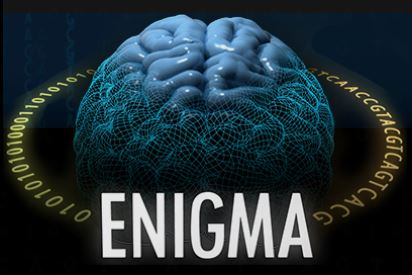

This notebook contains some sample queries to explore all the data stored in the ENIGMA Wiki. We can use the SPARQL Query language and the properties in the wiki to extract specific information about cohorts, projects, working groups, etc.
Let's get started!

In [2]:
import json
import requests
import pandas as pd

This following query shows us all of the different Working Groups which exist in the wiki along with the cohorts associated with them.

In [4]:
#Show all the working groups with their cohorts

query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?w ?a
WHERE 
{
    ?w wiki:Property-3AHasCohort_-28E-29 ?a.
}
ORDER BY ?w"""


response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

query_results=[]
print("Working Groups with Cohorts:")    
for item in res['results']['bindings']:
    w1 = item['w']['value'].replace(replace,"")
    a1 = item['a']['value'].replace(replace,"")
    query_results.append([w1,a1])

df = pd.DataFrame(query_results)
df.columns=['Working Group','Cohort']
df.head(20)

Working Groups with Cohorts:


,Working Group,Cohort
0,AMC_proj_Cortical_SCZ,AMC
1,AMC_proj_Subcortical_SCZ,AMC
2,ASRB_proj_Cortical_SCZ,ASRB
3,BD_WG,Academic_Medical_Center_-28AMC-29
4,BD_WG,Bipolar_Family_Study_-28BFS-29
5,BD_WG,CIAM
6,BD_WG,CLING
7,BD_WG,Cardiff
8,BD_WG,FIDMAG
9,BD_WG,Grupo_de_Investigaci-C3-B3n_en_Psiquiatr-C3-AD...


What if we wanted to identify which cohorts are common among two different working groups? We can do that as shown in the below example with the Schizophrenia Working Group and Bipolar Working Group.

In [13]:
#Show all the cohorts which belong to Schizophrenia Working Group and Bipolar Working Group

query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?a ?w1 ?w2
WHERE 
{
    ?w1 wiki:Property-3AHasName_Short_-28E-29 "SZ".
    ?w2 wiki:Property-3AHasName_Short_-28E-29 "BD".
    ?w1 wiki:Property-3AHasCohort_-28E-29 ?a.
    ?w2 wiki:Property-3AHasCohort_-28E-29 ?a.
}
ORDER BY ?a"""


response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

query_results=[]
print("Working Groups with Cohorts:")    
for item in res['results']['bindings']:
    a1 = item['a']['value'].replace(replace,"")
    w1 = item['w1']['value'].replace(replace,"")
    w2 = item['w2']['value'].replace(replace,"")
    query_results.append([a1,w1,w2])

df = pd.DataFrame(query_results)
df.columns=['Cohort','WG1','WG2']
df.head(20)

Working Groups with Cohorts:


,Cohort,WG1,WG2
0,CIAM,SZWorkingGroup,BD_WG
1,FIDMAG,SZWorkingGroup,BD_WG


This query shows us all the cohorts which have results available. To do this, we first look at all the pages which are classified as Cohorts. We can then utilize the property "hasProjectResults", which indicates whether a certain cohort has results for any of its associated projects. We check which cohorts have a value for the property "hasProjectResults", and return those cohorts.

In [34]:
#Which Cohorts have results available?

query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT distinct ?w ?a
WHERE 
{
    ?w wiki:Property-3AHasProjectResults ?a.
}"""


response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

print("Cohorts with results available:")    
query_results=[]
for item in res['results']['bindings']:
    w1 = item['w']['value'].replace(replace,"")
    a1 = item['a']['value'].replace(replace,"")
    query_results.append([w1,a1])

df = pd.DataFrame(query_results)
df.columns=['Cohort','Project Results']
df.head(10)

Cohorts with results available:


,Cohort,Project Results
0,Test_Cohort,ExampleValue
1,1000BRAINS_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_1000BRAINS
2,ADNI1_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_ADNI1
3,ADNI2GO_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_ADNI2GO
4,ALSPACa_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_ALSPACa
5,ASRB_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_ASRB
6,BETULA_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_BETULA
7,BIG-2DAffy_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_BIG-2DAffy
8,BIG-2DPsychChip_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_BIG-2DPsychChip
9,BONN_ENIGMA3_Cortical_GWAS,ENIGMA3_Cortical_GWAS_BONN


If we wanted to identify the number of cohorts which had results available, we can utilize COUNT in the query to find the total number.

In [42]:
query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT (COUNT(distinct ?w) as ?count)
WHERE 
{
    ?w wiki:Property-3AHasProjectResults ?a.
}"""


response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

print("Cohorts with results available:")    
for item in res['results']['bindings']:
     print ("*" + item['count']['value'].replace(replace,""))

Cohorts with results available:
*117


The next query shows us all the cohorts which belong to the SZ (Schizophrenia) Working group along with the number of participants in each cohorts. We identify the SZ Working group and then use the property HasNumberOfParticipants to identify how many participants exist in each cohort.

In [27]:
#What is the number of participants in each project within the SZ working group?
query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT ?c ?num
WHERE 
{
    ?w wiki:Property-3AHasName_Short_-28E-29 "SZ".
    ?w wiki:Property-3AHasCohort_-28E-29 ?c.
    ?c wiki:Property-3AHasNumberOfParticipants_-28E-29 ?num.
}"""


response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

print("Number of participants in cohorts associated with SZ Working Group:")    

query_results=[]
for item in res['results']['bindings']:
    w1 = item['c']['value'].replace(replace,"")
    a1 = item['num']['value'].replace(replace,"")
    query_results.append([w1,a1])

df = pd.DataFrame(query_results)
df.columns=['Cohort','Number of Participants']
df.head(10)

Number of participants in cohorts associated with SZ Working Group:


,Cohort,Number of Participants
0,AMC,376
1,CAMH,264
2,CIAM,51
3,CLING,372
4,COBRE,198
5,DublinDonohoe,284
6,EdinburghEHRS,67
7,EdinburghFunc,60
8,EdinburghSFMH,76
9,ESO,80


This query allows us to identify the cohorts which have participants within the age range 20 - 40. We make use of the properties HasAge_Minimum and HasAge_Maximum to see whether the cohort has any participants within the given range.

In [20]:
#Which Cohorts have patients in the age range (20 - 40)
query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT distinct ?cohort ?minage ?maxage
WHERE 
{
    ?cohort wiki:Property-3AHasAge_Minimum_-28E-29 ?minage.
    ?cohort wiki:Property-3AHasAge_Maximum_-28E-29 ?maxage.
    FILTER (?minage >= "20" && ?maxage <= "40")
}
ORDER BY ?cohort"""


response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

print("Cohorts with patients between the age range 20-40:")

query_results=[]
for item in res['results']['bindings']:
    w1 = item['cohort']['value'].replace(replace,"")
    query_results.append([w1])

df = pd.DataFrame(query_results)
df.columns=['Cohort']
df.head()

Cohorts with patients between the age range 20-40:


,Cohort
0,BrainScale_prj_ENIGMA3_Cortical_GWAS
1,CHARGE_Replication_Cohort_prj_ENIGMA3_Cortical...
2,ID1000_Replication_Cohort_prj_ENIGMA3_Cortical...
3,NeuroIMAGE_prj_ENIGMA3_Cortical_GWAS
4,PING-2DnonEUR_prj_ENIGMA3_Cortical_GWAS


The following tells us the specific brain scan datatypes associated with each cohort. We make use of the property HasBrainScanDataType to do this.

In [3]:
#Which cohorts have data corresponding to brain scan data-types?
query = """PREFIX wiki: <http://localhost:8080/enigma_new/index.php/Special:URIResolver/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT distinct ?cohort ?data
WHERE 
{
    ?cohort wiki:Property-3AHasBrainScanDataType_-28E-29 ?data.
    ?cohort a wiki:Category-3ACohort_-28E-29.
}
ORDER BY ?cohort"""

response = requests.post(url, data = {'query': query})
res = json.loads(response.text)

print("Cohorts with datatypes:")    
query_results=[]
for item in res['results']['bindings']:
    w1 = item['cohort']['value'].replace(replace,"")
    a1 = item['data']['value'].replace(replace,"")
    query_results.append([w1,a1])

df = pd.DataFrame(query_results)
df.columns=['Cohort','Datatype']
df.head(20)

Cohorts with datatypes:


,Cohort,Datatype
0,1000BRAINS,T1w
1,ADNI1,DWI
2,ADNI1,T1w
3,ADNI2GO,T1w
4,ALSPACa,T1w
5,ASRB,T1w
6,BETULA,T1w
7,BIG-2DAffy,T1w
8,BIG-2DPsychChip,T1w
9,BONN,T1w
